# Objective

The primary objective of this project is to analyze unemployment trends with Indian Unemployment dataset. To perform an in-depth Exploratory Data Analysis (EDA) on the Unemployment in India dataset from Kaggle to understand the patterns, trends, and regional disparities in unemployment across the country. The analysis aims to visualize how unemployment rates have changed over time, examine correlations with other labour market indicators such as labour participation rate and employment levels, and identify the states most affected. This insight can help in understanding the socio-economic impact of unemployment and inform data-driven decisions for policy and development.

# Metadata

The dataset provides insights into the unemployment scenario across different Indian states:

Region: The states within India.
Date: The date when the unemployment rate was recorded.
Frequency: The frequency at which measurements were taken (Monthly).
Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India.
Estimated Employed: The count of people currently employed.
Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.
Area: The area of the region whether it is rural or urban

This dataset provides a comprehensive view of unemployment trends across various Indian states during the COVID-19 pandemic. It offers valuable insights into how the crisis affected employment levels, unemployment rates, and labour force participation across different regions. The analysis aims to highlight the socio-economic impact of the pandemic on India’s workforce and labour market dynamics.

# Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import calendar

# Load dataset into dataframe

In [7]:
df=pd.read_csv('/content/Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [9]:
import datetime as dt
# Renaming columns for better clarity
df1.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df1['Frequency'] = df1['Frequency'].astype('category')
df1['Region'] = df1['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
df1['Month'] = df1['Date'].dt.month

# Converting 'Month' to integer format
df1['Month_int'] = df1['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df1['Month_name'] = df1['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df1.drop(columns='Month', inplace=True)

In [10]:
df1.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


# Removing spaces before and after the column names

In [11]:
df.columns = df.columns.str.strip()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [13]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [14]:
df.shape

(768, 7)

In [15]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [16]:
df=df.dropna()

In [17]:
df_stat = df1[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
print(round(df_stat.describe().T, 2))

                                     count         mean          std  \
Estimated Unemployment Rate          267.0        12.24        10.80   
Estimated Employed                   267.0  13962105.72  13366318.36   
Estimated Labour Participation Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated Unemployment Rate               0.50        4.84        9.65   
Estimated Employed                   117542.00  2838930.50  9732417.00   
Estimated Labour Participation Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated Unemployment Rate                16.76        75.85  
Estimated Employed                   21878686.00  59433759.00  
Estimated Labour Participation Rate        44.06        69.69  


In [18]:
region_stats = df1.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed',
                                       'Estimated Labour Participation Rate']].mean().reset_index()
print(round(region_stats, 2))

      Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated Labour Participation Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


/tmp/ipython-input-18-3491731444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = df1.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed',


Observation: From the region stats, north region has higher unemployment rate

<Axes: >

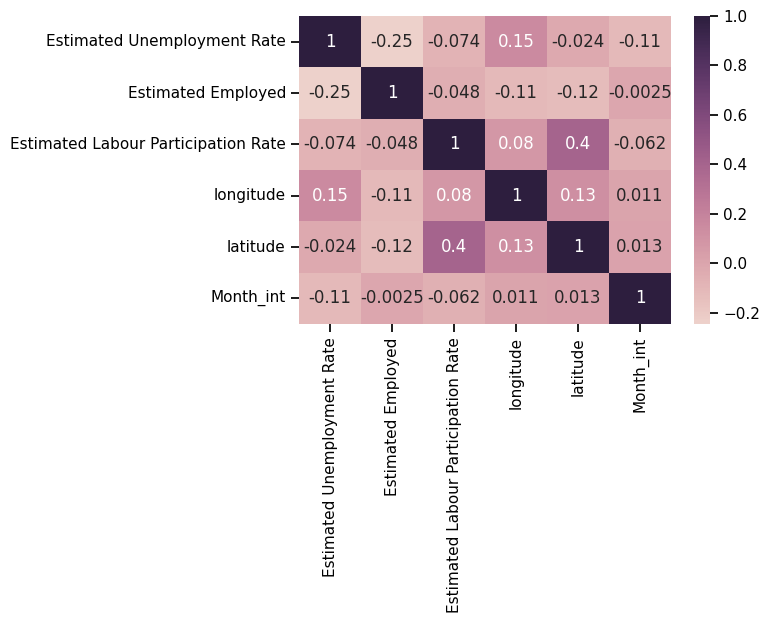

In [19]:
hm = df1[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

# Formatting the datatypes

In [20]:
# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Importing Warnings library
import warnings

# Ignoring unwanted warnings
warnings.filterwarnings("ignore")

df

/tmp/ipython-input-20-898704353.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipython-input-20-898704353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipython-input-20-898704353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day
/tmp/ipython-input-20-898704353.

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,May,2020


# Summary statistics

In [21]:
print(df.describe())

# Mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06                                38.06

# Trend of Unemployment Rate Over Time

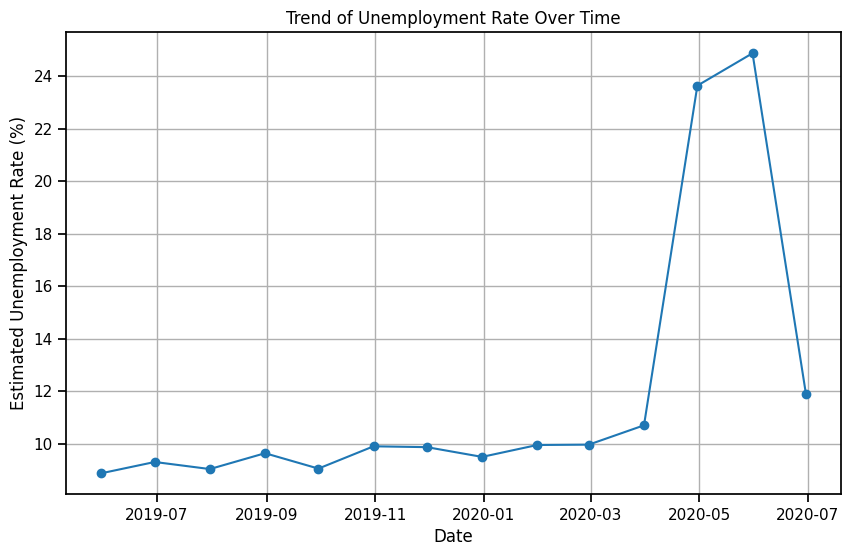

In [22]:
# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Trend of Unemployment Rate Over Time')
plt.grid(True)

plt.show()

Observation:
From 2020 march to 2020 july impact of unemployment is high

# Boxplot of Unemployment rate per States

In [23]:
fig = px.box(df, x='Region', y='Estimated Unemployment Rate (%)', color='Region', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
plt.figure(figsize=(6, 4))
fig.show()

<Figure size 600x400 with 0 Axes>

Observation: Boxplot shows the region of unemployment in descending order. Highest is Tripura and lowest is Sikkim

The highest outlier found in puducherry

# Barplot showing the Unemployment Rate across region

In [24]:
# Bar Plot of Average Estimated Unemployment Rate across region
fig = px.bar(df, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Average unemployment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

Observation: Barplot shows the unemployment rate across region which is same as boxplot

# Scatter matrix cosidering the employed and unemployed rates

In [39]:
fig = px.scatter_matrix(df1,template='seaborn',dimensions=['Estimated Unemployment Rate', 'Estimated Employed',
                                                          'Estimated Labour Participation Rate'],color='Region')
fig.show()

# Average Estimated Employed people in every month

In [26]:
# Bar Plot of Estimated Employed people in every month
fig = px.bar(df, x = 'Month', y = 'Estimated Employed', color = 'Month', title = 'Estimated Employed People')
fig.show()

Observation: The highest employment happens in June month

# Bar chart showing the unemployment rate across regions from Jan. 2020 to Oct. 2020

In [27]:
import plotly.express as px
fig = px.bar(df1, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

Observation: On april 2020 unemployment rate is high in South and East next to that north has higher unemployment rate.
On may 2020 unemployment rate is high in North and South next to that east has higher unemployment rate.
From June to October, north has higher unemployment rate

# Sunburst plot of Estimated Unemployment Rate by Region and state

In [28]:
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and state')
fig.show()

Observation: Urban has highest unemployment rate than rural

In [30]:
# Correlation Analysis
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
print(correlation)

                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


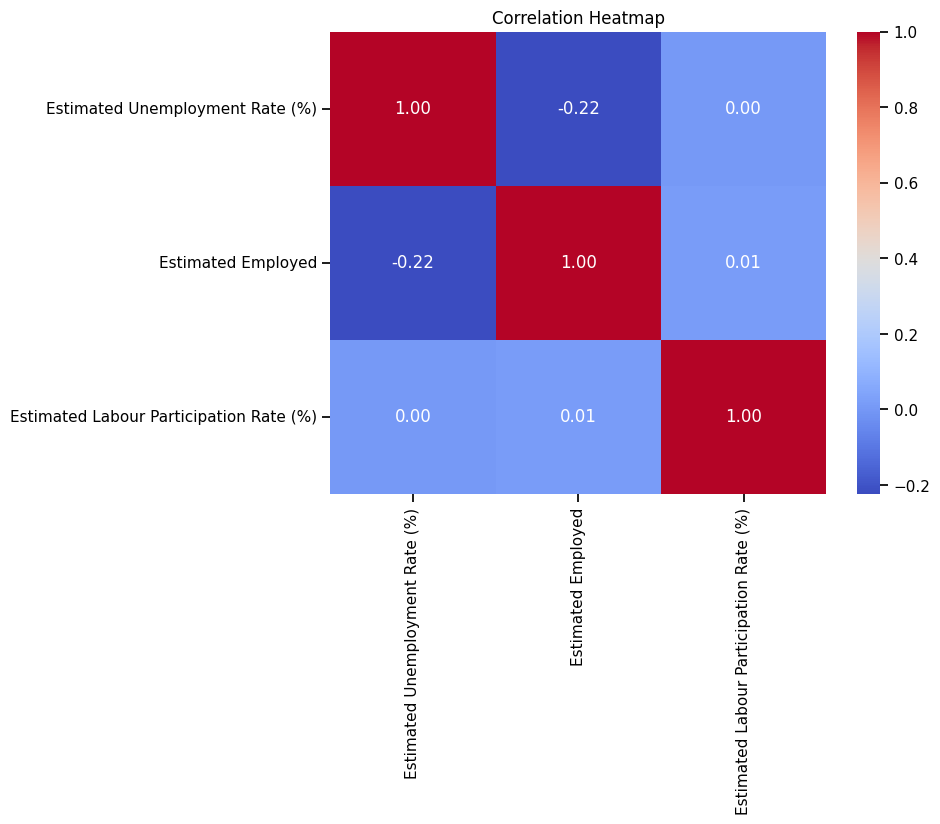

In [31]:
# Calculate correlation matrix
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [32]:
from scipy.stats import ttest_ind

urban_unemployment = df[df['Area'] == 'Urban']['Estimated Unemployment Rate (%)']
rural_unemployment = df[df['Area'] == 'Rural']['Estimated Unemployment Rate (%)']

t_stat, p_val = ttest_ind(urban_unemployment, rural_unemployment)
print(f'T-Statistic: {t_stat:.2f}')
print(f'P-Value: {p_val:.2f}')

T-Statistic: 3.63
P-Value: 0.00


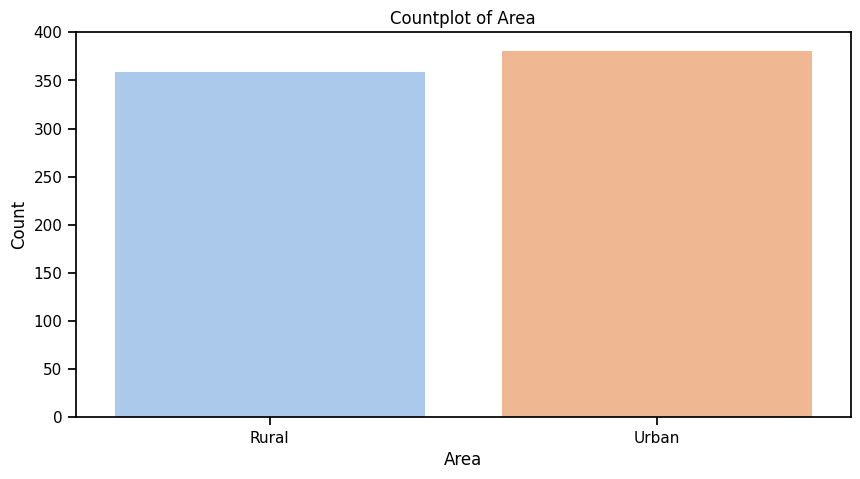

In [33]:
# make countplot for Area
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Area', data=df,palette='pastel')
plt.title('Countplot of Area')
plt.xlabel('Area')
plt.ylabel('Count')
# save the plot
plt.savefig('countplot_area.png', dpi=300)
plt.show()

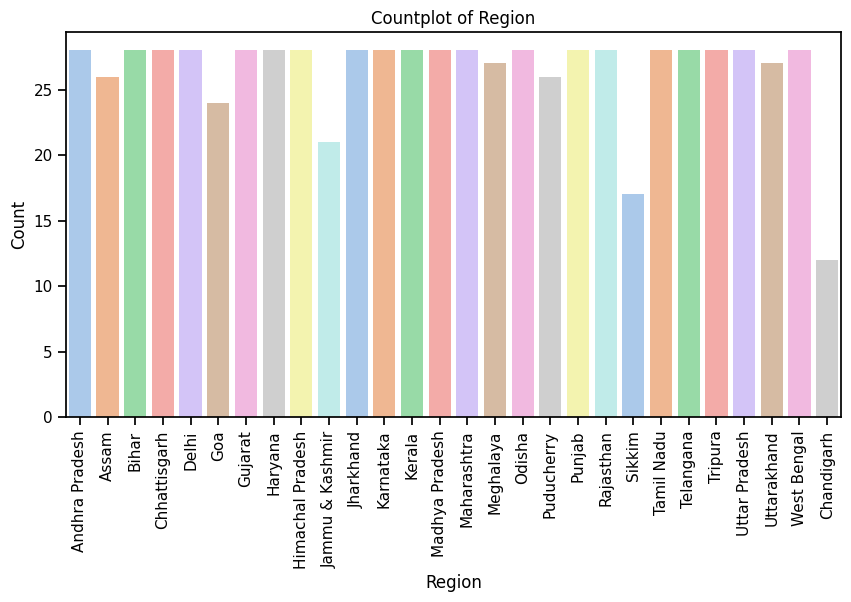

In [34]:
# make countplot for Region
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', data=df,palette='pastel')
plt.xticks(rotation ='vertical')
plt.title('Countplot of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Impact of Lockdown on States Estimated Employed

In [35]:
fig = px.scatter_geo(df1,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

Observation: The northern region has more unemployment. During april to june all the other regions are impacted on unemployment.

In [43]:
lock = df1[(df1['Month_int'] >= 4) & (df1['Month_int'] <=7)]
bf_lock = df1[(df1['Month_int'] >= 1) & (df1['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head( )


,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


from matplotlib import pyplot as plt
_df_8['Unemployment Rate after lockdown'].plot(kind='hist', bins=20, title='Unemployment Rate after lockdown')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Unemployment Rate before lockdown'].plot(kind='hist', bins=20, title='Unemployment Rate before lockdown')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('States').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Unemployment Rate after lockdown', y='Unemployment Rate before lockdown', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Unemployment Rate after lockdown'].plot(kind='line', figsize=(8, 4), title='Unemployment Rate after lockdown')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Unemployment Rate before lockdown'].plot(kind='line', figsize=(8, 4), title='Unemployment Rate before lockdown')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Unemployment Rate after lockdown', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['States'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Unemployment Rate before lockdown', y='States', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Observation: The lockdown period is given from april to july
Before lockdown is from jan to april
Then calculating the average unemployment rate for each state before lockdown and during the lockdown

In [45]:
# percentage change in unemployment rate

g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment').reset_index(drop=True)
plot_per

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown,percentage change in unemployment
0,Meghalaya,4.800000,4.2150,3.80
1,Assam,6.245000,6.2250,5.24
2,Uttarakhand,8.870000,9.2025,7.87
3,Sikkim,8.925000,12.9250,7.93
4,Gujarat,8.965000,9.3225,7.96
5,Telangana,9.215000,6.4500,8.22
6,Chhattisgarh,9.602500,7.2450,8.60
7,Odisha,10.205000,10.4650,9.20
8,Madhya Pradesh,11.475000,5.8150,10.48
9,West Bengal,12.235000,9.0475,11.24


from matplotlib import pyplot as plt
plot_per['Unemployment Rate after lockdown'].plot(kind='hist', bins=20, title='Unemployment Rate after lockdown')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
plot_per['Unemployment Rate before lockdown'].plot(kind='hist', bins=20, title='Unemployment Rate before lockdown')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
plot_per['percentage change in unemployment'].plot(kind='hist', bins=20, title='percentage change in unemployment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
plot_per.plot(kind='scatter', x='Unemployment Rate after lockdown', y='Unemployment Rate before lockdown', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
plot_per.plot(kind='scatter', x='Unemployment Rate before lockdown', y='percentage change in unemployment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unemployment Rate after lockdown']
  ys = series['Unemployment Rate before lockdown']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = plot_per.sort_values('Unemployment Rate after lockdown', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unemployment Rate after lockdown')
_ = plt.ylabel('Unemployment Rate before lockdown')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unemployment Rate after lockdown']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unemployment Rate after lockdown'}, axis=1)
              .sort_values('Unemployment Rate after lockdown', ascending=True))
  xs = counted['Unemployment Rate after lockdown']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = plot_per.sort_values('Unemployment Rate after lockdown', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unemployment Rate after lockdown')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['percentage change in unemployment']
  ys = series['Unemployment Rate before lockdown']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = plot_per.sort_values('percentage change in unemployment', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('percentage change in unemployment')
_ = plt.ylabel('Unemployment Rate before lockdown')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['percentage change in unemployment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'percentage change in unemployment'}, axis=1)
              .sort_values('percentage change in unemployment', ascending=True))
  xs = counted['percentage change in unemployment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = plot_per.sort_values('percentage change in unemployment', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('percentage change in unemployment')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
plot_per['Unemployment Rate after lockdown'].plot(kind='line', figsize=(8, 4), title='Unemployment Rate after lockdown')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
plot_per['Unemployment Rate before lockdown'].plot(kind='line', figsize=(8, 4), title='Unemployment Rate before lockdown')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
plot_per['percentage change in unemployment'].plot(kind='line', figsize=(8, 4), title='percentage change in unemployment')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()

Observation:
After Lockdown the mostly impacted state with unemployment are
1. Puducherry
2. Jharkhand
3. Bihar
4. Haryana
5. Tripura
6. Tamilnadu
7. Delhi
